# Chapter 12: Graphs, Networks, Incidence Matrices

Reference    
Lecture video: https://www.youtube.com/watch?v=6-wh6yvk6uc        
Chinese note: https://nbviewer.jupyter.org/github/zlotus/notes-linear-algebra/blob/master/chapter12.ipynb  

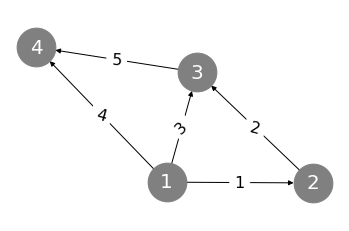

In [18]:
import networkx as nx
import matplotlib.pyplot as plt


dg = nx.DiGraph()
dg.add_edges_from([(1,2), (2,3), (1,3), (1,4), (3,4)])
edge_labels = {(1, 2): 1, (1, 3): 3, (1, 4): 4, (2, 3): 2, (3, 4): 5}

pos = nx.spring_layout(dg)
nx.draw_networkx_edge_labels(dg,pos,edge_labels=edge_labels, font_size=16)
nx.draw_networkx_labels(dg, pos, font_size=20, font_color='w')
nx.draw(dg, pos, node_size=1500, node_color="gray")

The graph has 4 nodes and 5 edges:

$$
\begin{array}{l|cccc} 
& \text {node}_{1} & \text {node}_{2} & \text {node}_{3} & \text {node}_{4} \\
\hline \text {edge}_{1} & -1 & 1 & 0 & 0 \\
\text {edge}_{2} & 0 & -1 & 1 & 0 \\
\text {edge}_{3} & -1 & 0 & 1 & 0 \\
\text {edge}_{4} & -1 & 0 & 0 & 1 \\
\text {edge}_{5} & 0 & 0 & -1 & 1
\end{array}
$$

We can obtain an $5\times 4$ incidence matrix $A$:

$$
A=\left[\begin{array}{cccc}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
-1 & 0 & 0 & 1 \\
0 & 0 & -1 & 1
\end{array}\right]
$$

The first three rows are linearly dependent and the corresponding edges of the three row vectors form a loop in the graph.

Now, let's solve $Ax = 0$:

$$
A x=\left[\begin{array}{cccc}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
-1 & 0 & 0 & 1 \\
0 & 0 & -1 & 1
\end{array}\right]\left[\begin{array}{l}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4}
\end{array}\right] \Longrightarrow \left[\begin{array}{l}
x_{2}-x_{1} \\
x_{3}-x_{2} \\
x_{3}-x_{1} \\
x_{4}-x_{1} \\
x_{4}-x_{3}
\end{array}\right]=\left[\begin{array}{l}
0 \\
0 \\
0 \\
0 \\
0
\end{array}\right]
$$

We can consider $x=\left[\begin{array}{llll}x_{1} & x_{2} & x_{3} & x_{4}\end{array}\right]$ as the `potential` at the nodes.  
Then $x_2 - x_1$ can be seen as the `potential difference` at the edge. 

We can easily obtain a solution $x =\left[\begin{array}{l}
1 \\
1 \\
1 \\
1 \\
\end{array}\right]$, which means each node has the same potential and the potential difference at each edge is 0. 

Note that $\left[\begin{array}{l}
1 \\
1 \\
1 \\
1 \\
\end{array}\right]$ can be a basis of the null space of $A$, thus $\operatorname{dimN}(A) = 1, \operatorname{rank}(A)=3$

How about the null space of $A^{\top}$, $A^{\top}y = 0$?

$$
A^{T} y=0=\left[\begin{array}{ccccc}
-1 & 0 & -1 & -1 & 0 \\
1 & -1 & 0 & 0 & 0 \\
0 & 1 & 1 & 0 & -1 \\
0 & 0 & 0 & 1 & 1
\end{array}\right]\left[\begin{array}{l}
y_{1} \\
y_{2} \\
y_{3} \\
y_{4} \\
y_{5}
\end{array}\right]=\left[\begin{array}{c}
0 \\
0 \\
0 \\
0
\end{array}\right]
$$

From previous lectures, we have known that $\operatorname{dimN}(A^{\top}) = m - r = 5-3=2$

We can use a matrix $C$ to connect the potential difference and the current. According to Ohm's Law: $I = \frac{U}{R}$. 

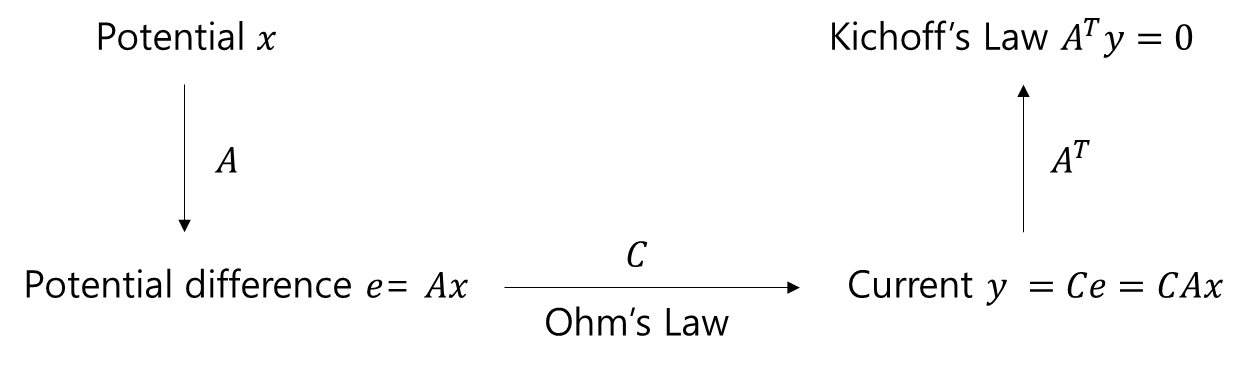

The linear equations corresponding to $A^{\top}y = 0 \Longrightarrow 
\left\{\begin{array}{r}
y_{1}+y_{3}+y_{4}=0 \\
y_{1}-y_{2}=0 \\
y_{2}+y_{3}-y_{5}=0 \\
y_{4}+y_{5}=0
\end{array}\right.
$

The first equation $-y_1  - y_3 - y_4 = 0$ is about node 1, it means that the sum of current through $A$ equals 0. Kichoff's law is a balance equation, it says that the `current in = current out`. Similarly, we have $y_1 = y_2, y_2 + y_3 = y_5, y_4+y_5 = 0$. 

How to get a basis of the null space of $A^{\top}$? Since $\operatorname{dimN}(A^{\top}) =2$, then a basis should have two vectors. We can get the solution by looking at the graph. 

The first vector:
* assume $y_1 =1$
* then $y_2=1 $
* assume $y_3 = -1$
* then $y_4 = y_5 = 0$

We get the first vector that satisfies Kchoff's Law: $\left[\begin{array}{c}1 \\ 1 \\ -1 \\ 0 \\ 0\end{array}\right]$. This is a solution that happens in the loop formed by node 1, node 2, node 3. 

Similarly, the second vector:
* Assume $y_1=0$, then $ y_2 = 0$
* Assume $y_3 = 1$
* then $y_5 = 1$
* then $y_4 = -1$

We get the second vector that satisfies Kchoff's Law:  $\left[\begin{array}{c}0 \\ 0 \\ 1 \\ -1 \\ 1\end{array}\right]$. This is a solution that happens in the loop formed by node 1, node 3, node 4. 

Therefore, a basis of $N(A^{\top})$ is:  $\left[\begin{array}{c}1 \\ 1 \\ -1 \\ 0 \\ 0\end{array}\right]$$\left[\begin{array}{c}0 \\ 0 \\ 1 \\ -1 \\ 1\end{array}\right]$

We can also get a vector that satisfies by condiering the big loop formed by node 1, node 2, node 3, node 4:
* Assume $y_3 = 0$
* Assume $y_1 = 1$, then $y_2 = 1$
* then $y_5 = 1$
* then  $y_4 = -1$

Thus the vector is: $\left[\begin{array}{c}1\\ 1 \\ 0 \\ -1 \\ 1\end{array}\right]$, which is the sum of the above two vectors. 


Now we consider the row space of $A$, which is the column space of $A^{T}=\left[\begin{array}{ccccc}-1 & 0 & -1 & -1 & 0 \\ 1 & -1 & 0 & 0 & 0 \\ 0 & 1 & 1 & 0 & -1 \\ 0 & 0 & 0 & 1 & 1\end{array}\right]$. 

According to the first vector of the basis, we can know that the first three columns of $A^{\top}$ is linearly dependent. The pivot columns are column 1, column 2, column 4. In the graph, we can see that the corresponding edges of the three columns does not form a loop. Therefore, we can say that `linearly independent means no loop`. A `tree` is a graph without loop. 

For the null space of $A^{\top}$, we have obtained:  $\operatorname{dimN}(A^{\top}) = m - r $, whihc means the number of independent loops. 

Overall, we obtain the famous `Euler's Formula`:
$$\underbrace{\operatorname{dimN}(A^{\top})}_\text{loops} = \underbrace{m}_\text{edges} - \underbrace{r}_{nodes-1}\Longrightarrow nodes - edges + loops = 1$$


The following gives an example of using Euler's Formula (refer to the following to the graph):

$$ \underbrace{5}_\text{nodes} - \underbrace{7}_\text{edges} + \underbrace{3}_\text{\loops} = 1$$

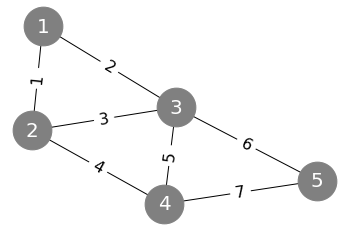

In [19]:
import networkx as nx
import matplotlib.pyplot as plt


dg = nx.Graph()
dg.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,4), (3, 5), (4, 5)])
edge_labels = {(1,2):1, (1,3):2, (2,3):3, (2,4):4, (3,4):5, (3, 5):6, (4, 5):7}

pos = nx.spring_layout(dg)
nx.draw_networkx_edge_labels(dg,pos,edge_labels=edge_labels, font_size=16)
nx.draw_networkx_labels(dg, pos, font_size=20, font_color='w')
nx.draw(dg, pos, node_size=1500, node_color="gray")

To summarise:

* Without outsource:
    * We obtain poential difference by: $e =  Ax$
    * We obtain current by: $y = Ce$
    * The current satisfies Kichoff's Law: $A^{\top}y = 0$

* With outsource: 
    * Adding battery on the edge will change $e = Ax$
    * Adding current on the node will change  $A^{\top}y = 0$ into  $A^{\top}y = f$
    * Thus we have: $A^{\top}CAx = f$